# 자동차 연비 예측

In [1]:
# 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

* 런타임 다시 시작 

In [1]:
# 런타임 다시 시작 후 다시 실행
import numpy as np
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

Text(0.5, 0, '시간(분)')

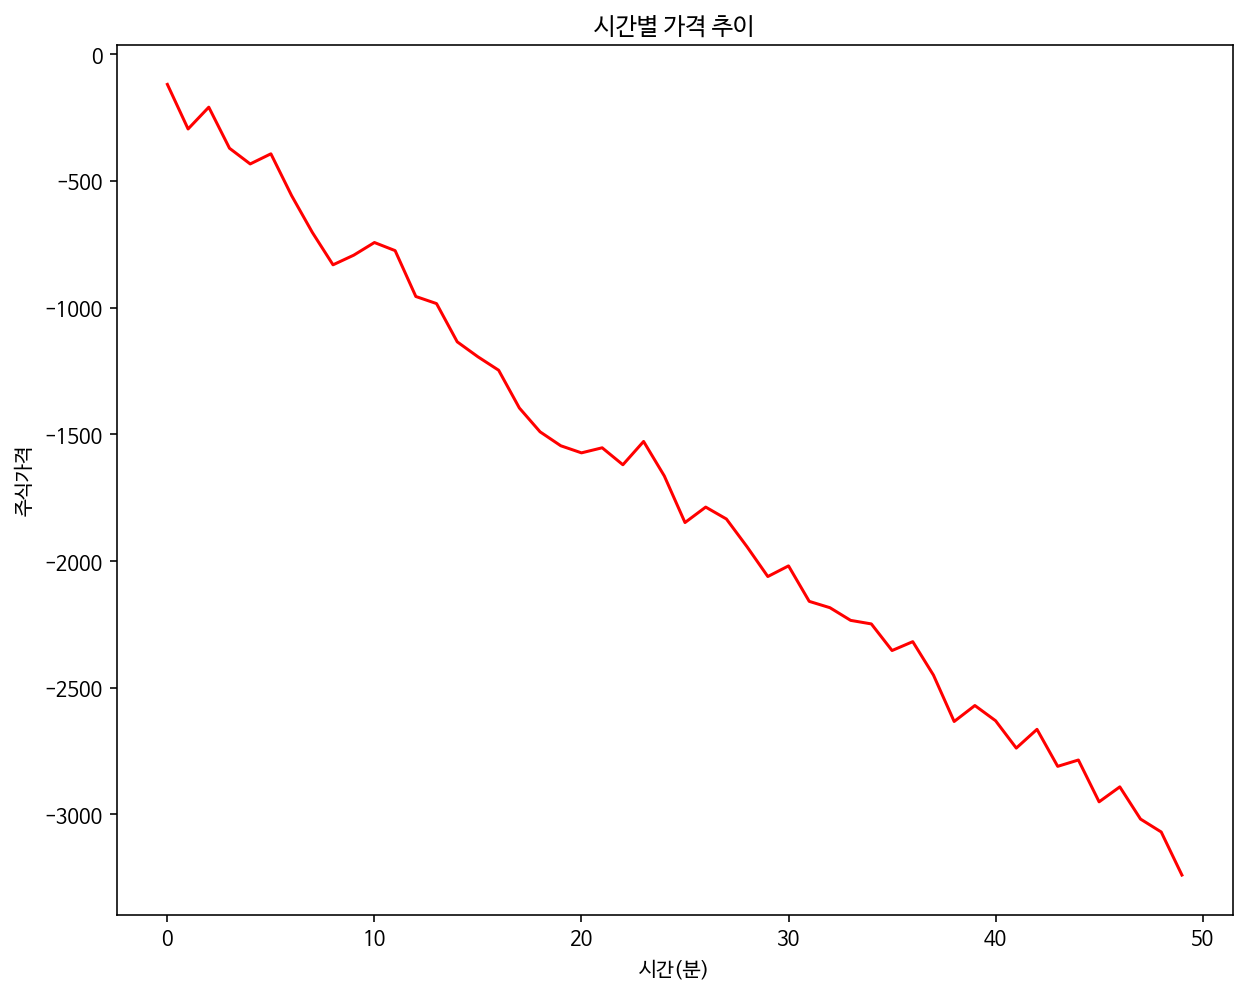

In [3]:
# [테스트]
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()
# 한글을 넣어놓고 그려보면 깨진다
plt.figure(figsize=(10,8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

# 회귀분석

* 연속적인 값을 갖는 연속 변수를 예측하는데 사용
* 분석 모형이 예측하고자 하는 목표를 종속 변수 또는 예측 변수라 부른다.
* 예측을 위해 모형이 사용하는 속성을 독립 변수 또는 설명 변수라 부른다.

### EDA

데이터 준비

In [4]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read_csv() 함수로 df 생성
df_auto = pd.read_csv('/content/auto-mpg.csv', header=None)
# 열 이름을 지정
df_auto.columns = ['연비(mpg)', '실린더 수', '배기량', '출력', '차중', '가속능력', '출시년도', '제조국', '모델명']
df_auto.head()

,연비(mpg),실린더 수,배기량,출력,차중,가속능력,출시년도,제조국,모델명
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연비(mpg)  398 non-null    float64
 1   실린더 수    398 non-null    int64  
 2   배기량      398 non-null    float64
 3   출력       398 non-null    object 
 4   차중       398 non-null    float64
 5   가속능력     398 non-null    float64
 6   출시년도     398 non-null    int64  
 7   제조국      398 non-null    int64  
 8   모델명      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
# 데이터 통계 요약정보 확인
df_auto.describe()

,연비(mpg),실린더 수,배기량,차중,가속능력,출시년도,제조국
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# 출력 열의 자료형 변경 (문자열 -> 숫자)
df_auto['출력'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [10]:
df_auto['출력'].replace('?', np.nan, inplace=True)    # '?'을 np.nan으로 변경
df_auto.dropna(subset=['출력'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df_auto['출력'] = df_auto['출력'].astype('float')   # 문자열을 실수형으로 변환

In [11]:
df_auto['출력'].isnull().sum()

0

### 단순회귀분석

* 어떤 독립 변수(X)가 종속 변수(Y)에 영향을 준다면 두 변수 사이에 선형관계가 있다고 이야기한다.
* 데이터 간의 선형관계가 있다면 새로운 독립 변수(X)가 주어졌을 때, 거기에 대응되는 종속 변수(Y)를 예측할 수 있다.
* 수학적으로 종속변수(Y)와 독립변수(X) 사이의 관계를 1차 함수 Y = ax + b 로 나타낸다.  

<br>

속성(feature 또는 variable) 선택

In [13]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 차중)
ndf = df_auto[['연비(mpg)', '실린더 수', '출력', '차중']]
ndf.head()

,연비(mpg),실린더 수,출력,차중
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


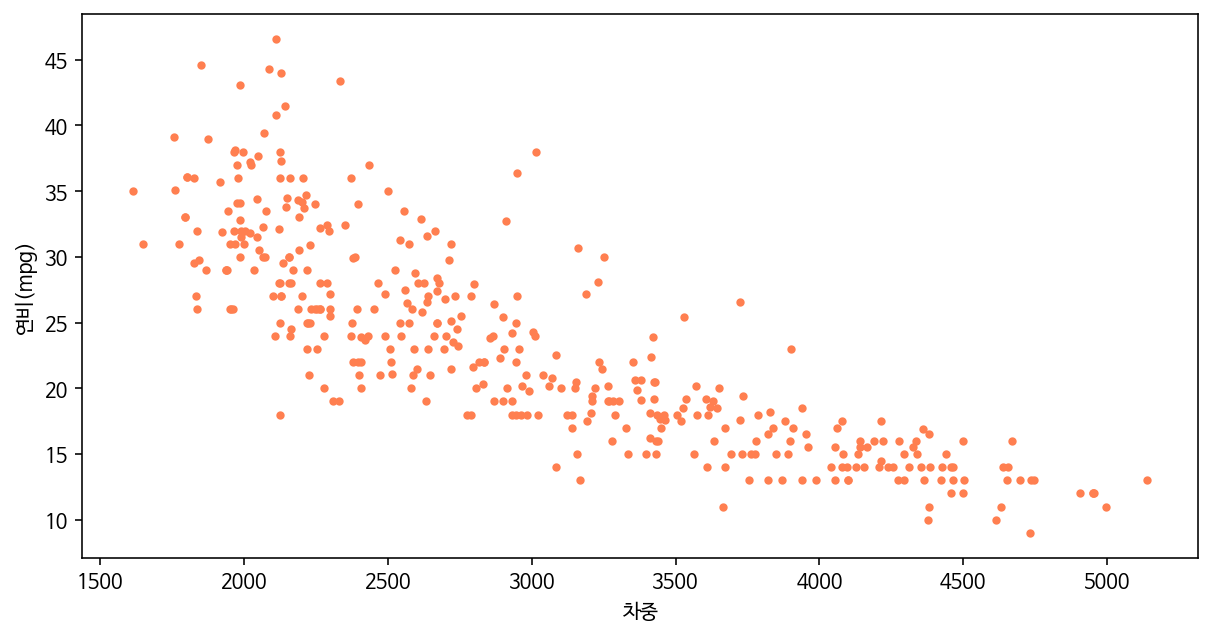

In [16]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='차중', y='연비(mpg)', c='coral', s=10, figsize=(10,5))
plt.show()

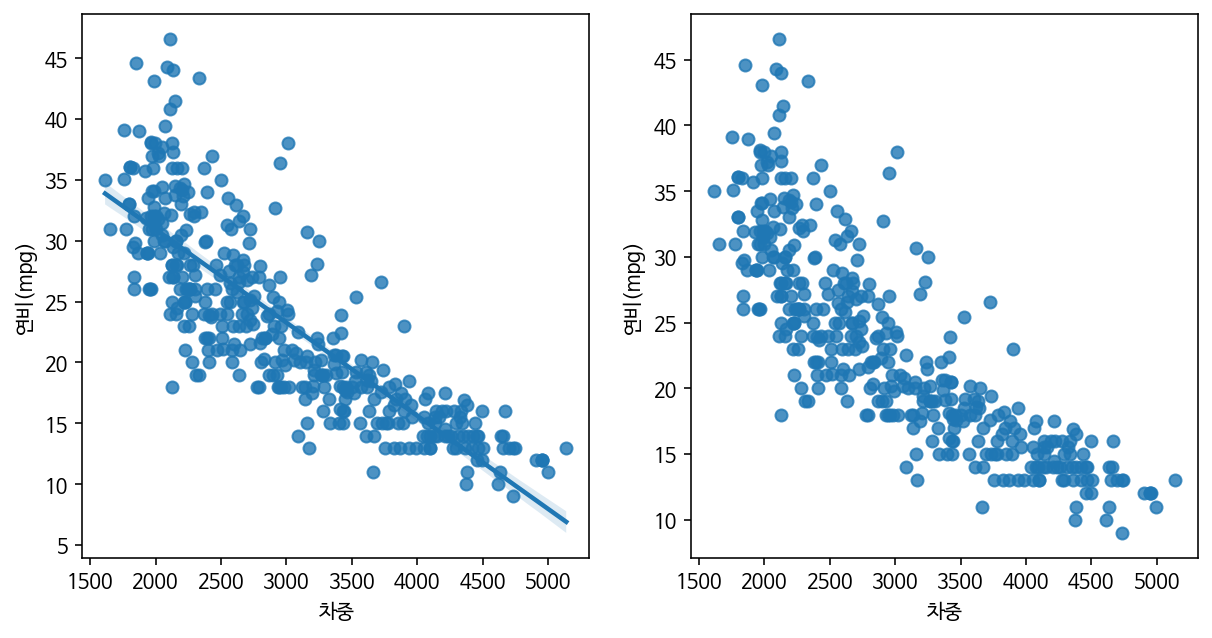

In [18]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='차중', y='연비(mpg)', data=ndf, ax=ax1)    # 회귀선 표시
sns.regplot( x='차중', y='연비(mpg)', data=ndf, ax=ax2, fit_reg=False)    # 회귀선 미표시
plt.show()

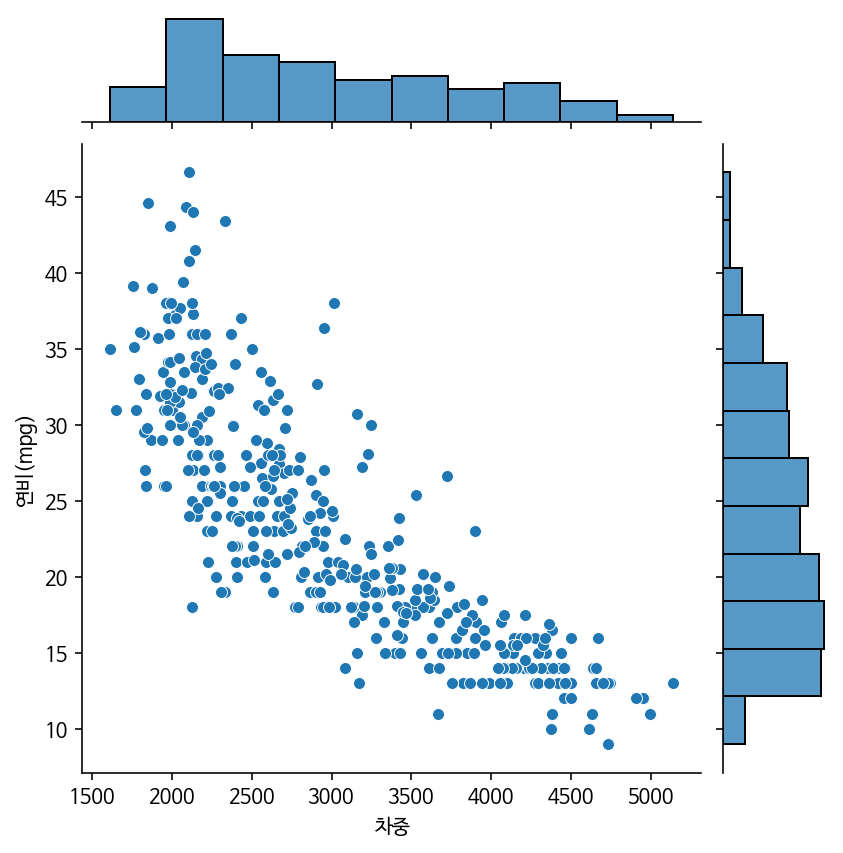

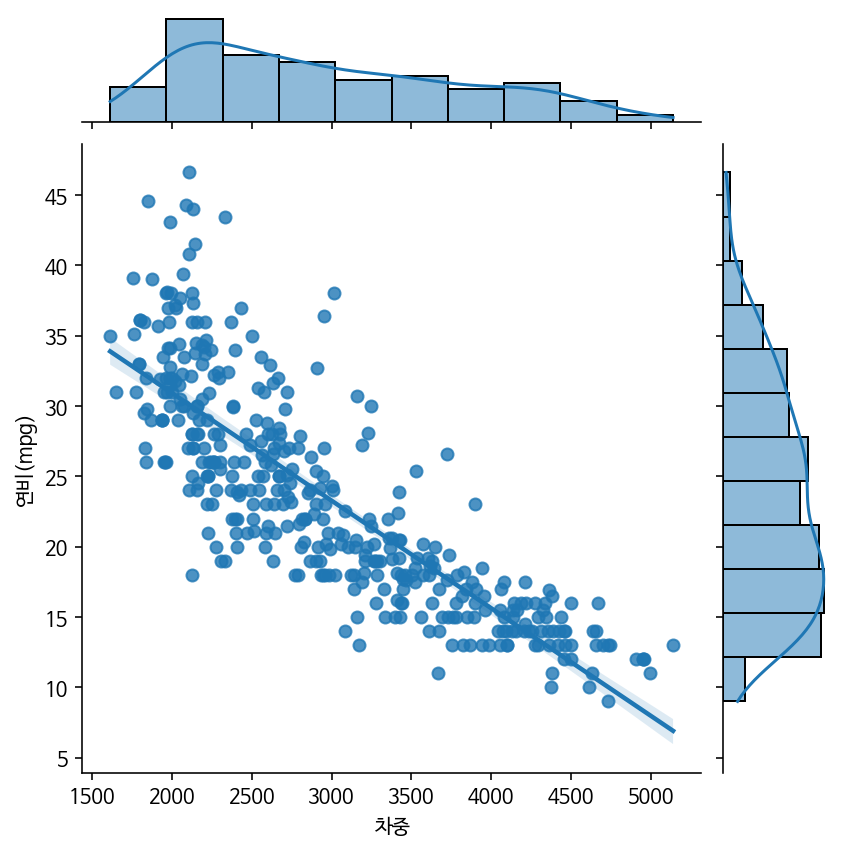

In [19]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='차중', y='연비(mpg)', data=ndf)                # 회귀선 없음
sns.jointplot(x='차중', y='연비(mpg)', kind='reg', data=ndf)    # 회귀선 표시(kind='reg')
plt.show()

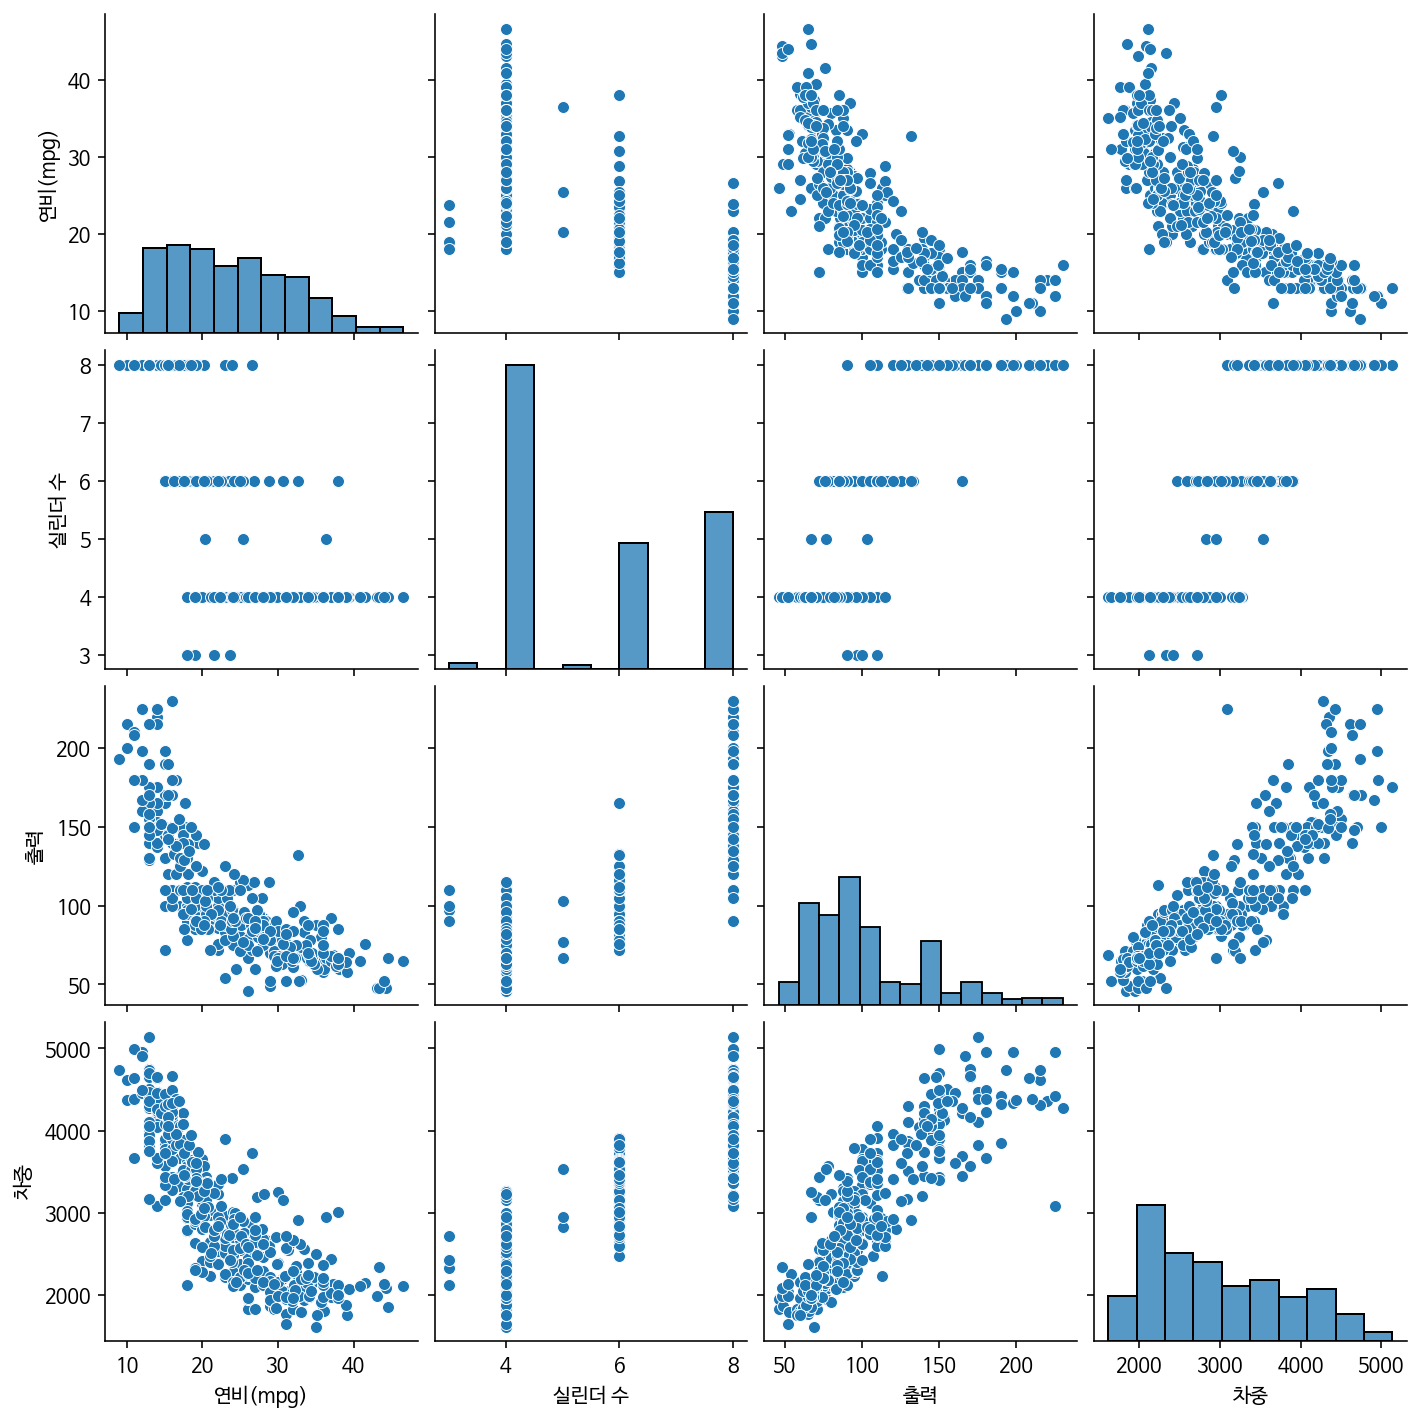

In [20]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()

데이터셋 구분 (Train & Test)

In [21]:
# 속성(변수) 선택
X = ndf[['차중']]       # 독립 변수 X   ## 집합형태이기에 2차원 배열 table 형태여야 함. 그래서 하나의 단위변수를 사용하더라도 2차원 형태로 사용
y = ndf['연비(mpg)']    # 종속 변수 Y   ## y는 정답레이블만 들어가면 되기에 1차원 형태로 넣어줌

In [24]:
# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,                  # 독립 변수
                                                    y,                  # 종속 변수
                                                    test_size=0.3,      # 검증 30%
                                                    random_state=10)    # 랜덤 추출 값

print('train data 개수:', len(X_train))
print('test data 개수:', len(X_test))

train data 개수: 274
test data 개수: 118


In [25]:
len(y_train)

274

In [26]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression()

* R제곱은 바로 다른 말로는 설명력 혹은 결정계수
* 독립변수가 종속변수에 대해 얼마만큼의 설명력을 가지게 되는지를 나타내는 수치  

<br>

결정계수 = 1 : 회귀직선으로 Y를 완전히 설명 가능. 회귀식의 정확도 매우 높음.  
결정계수 = 0 : 추정된 회귀직선은 X와 Y의 관계 설명 불가. 회귀식의 정확도 매우 낮음  

In [27]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6822458558299322

In [28]:
# 회귀식의 기울기(W)
print('기울기 a:', lr.coef_)

기울기 a: [-0.00775343]


In [30]:
# 회귀식의 y절편
print('y절편 b:', lr.intercept_)

y절편 b: 46.7103662572801


In [31]:
# 모형에 X_test 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X_test)
y_hat

array([25.62103211, 27.13295129, 20.19362994, 33.06432652, 15.07636504,
       19.99979415, 16.70458569,  6.85772747, 28.6061033 , 29.04804891,
       20.8449182 , 20.10058876, 25.62103211, 26.66774539, 13.57219929,
       18.23976516, 24.19440068, 29.49774795, 12.78134926, 12.95192476,
       13.9908846 , 31.28103723, 22.37234424, 15.27020083, 18.0769431 ,
       10.78871732, 17.39464111, 30.15678964, 21.39541185, 26.17927919,
       21.64352166, 21.82185059, 26.35760812, 23.35703006, 22.90733103,
       30.62199554, 31.31980439, 21.73656284, 17.42565484, 25.94667624,
       21.81409716, 23.57412615, 30.27309111, 21.66678196, 22.28705649,
       10.60263496, 15.06085818, 32.17268187, 22.24828933, 29.7303509 ,
       29.14884352, 11.82767717, 23.28724918, 13.70400763, 17.54970974,
       24.72938747, 24.11686637, 29.73810433, 30.24207739, 25.62103211,
       31.04843428, 27.00114295, 19.37951962, 23.87650999, 26.04747085,
       32.9635319 ,  7.9664682 , 23.83774283, 21.35664469, 14.69

In [32]:
df_y = pd.DataFrame({'y_hat': y_hat, 'y': y_test})
df_y

,y_hat,y
243,25.621032,21.5
371,27.132951,29.0
300,20.193630,23.9
345,33.064327,35.1
265,15.076365,17.5
...,...,...
384,31.474873,32.0
20,25.993197,25.0
189,15.991270,15.5
60,28.040103,20.0


In [33]:
df_y['차이'] = df_y['y_hat'] - df_y['y']
df_y

,y_hat,y,차이
243,25.621032,21.5,4.121032
371,27.132951,29.0,-1.867049
300,20.193630,23.9,-3.706370
345,33.064327,35.1,-2.035673
265,15.076365,17.5,-2.423635
...,...,...,...
384,31.474873,32.0,-0.525127
20,25.993197,25.0,0.993197
189,15.991270,15.5,0.491270
60,28.040103,20.0,8.040103


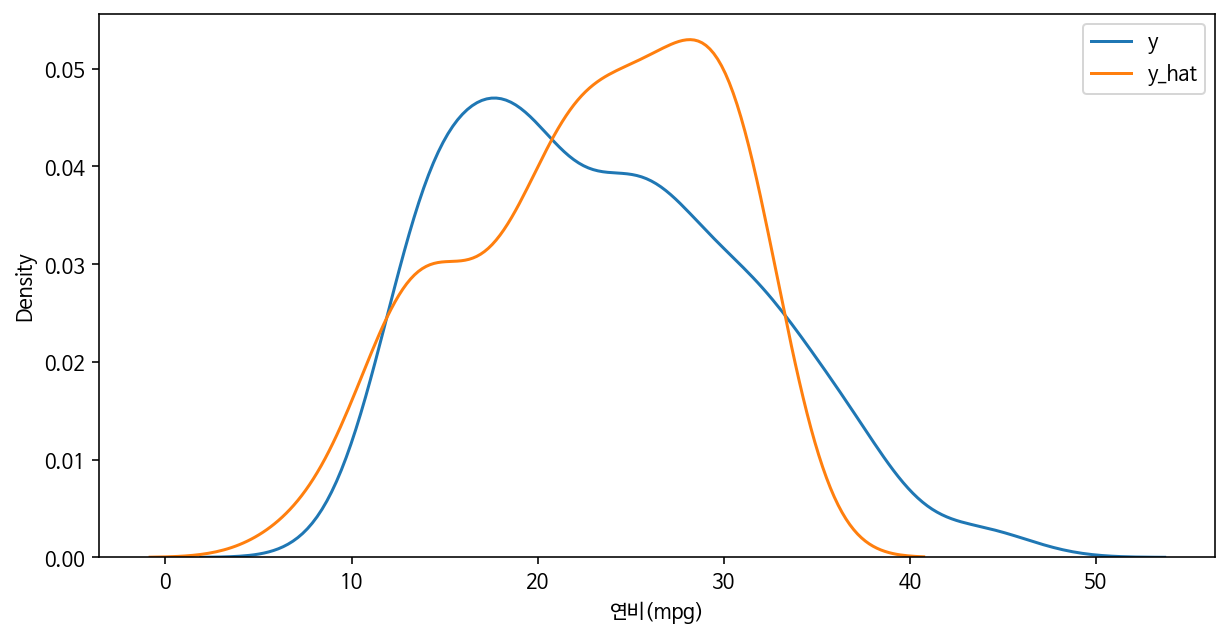

In [34]:
plt.figure(figsize=(10, 5))
# 커널 밀도 추정(KDE: Kernel Density Estimator)
# 쉽게 이야기하면 히스토그램과 같은 결과를 곡선형태로 표현한거라 생각
# 자세하고 확실한 내용은 https://sungkee-bool.tistory.com/2 참고
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [36]:
((df_y['y_hat'] - df_y['y'])**2).mean()

17.99017894105481

### 비선형회귀 분석

- 단순회귀 분석은 두 변수 간의 관계를 직선 형태로 설명하는 알고리즘이다.
- 독립 변수 X와 종속 변수 Y 사이에 선형 상관관계가 있지만, 직선보다 곡선으로 설명하는 것이 적합할 때는 단순 회귀 분석은 부적합하다.

<br>

- 다항회귀분석은 2차함수 이상의 다항 함수를 사용하여 두 변수 간의 선형 관계를 설명한다.
- 2차 함수는 종속 변수Y와 독립 변수 X 사이의 관계를 $Y = zX^2 + bX + c$로 표시하여 설명한다.

<br>

데이터셋 구분 - 훈련용(train data)/검증용(test data)

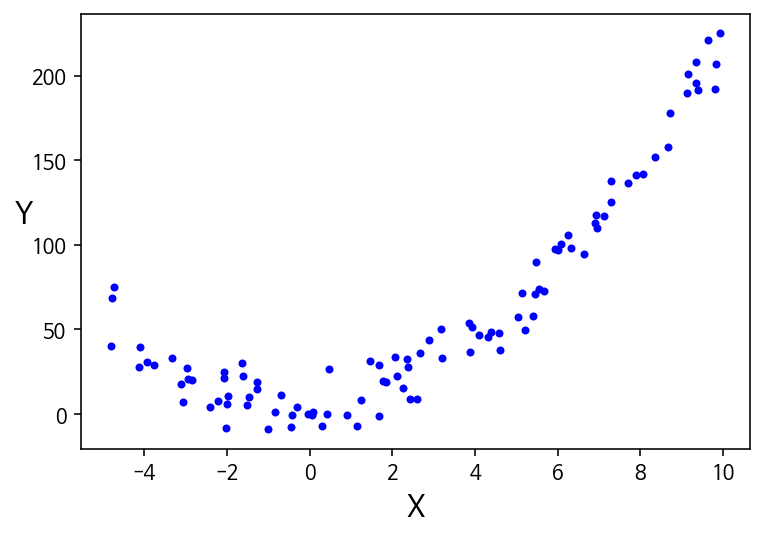

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
X = -5 + 15 * np.random.rand(n, 1)
noise = 10 * np.random.randn(n, 1)

y = 2*X**2 + 1*X + 10 + noise   # 2차 방정식에 noise 를 포함(ax^2 + bx + c + noise)

plt.plot(X, y, 'b.')    # 파란색 점만 찍으라는 의미에서 b. (blue . 인듯?)
plt.ylabel('Y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15)
plt.show()

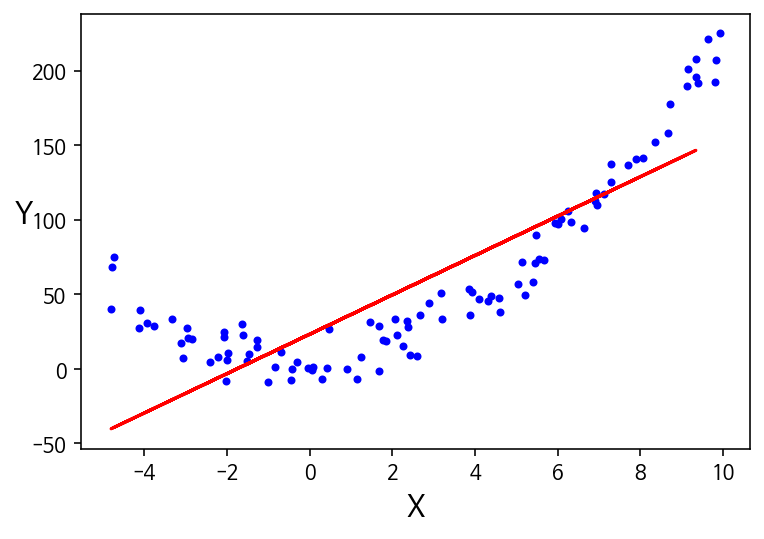

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

plt.plot(X, y, 'b.')
plt.ylabel('Y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15)
plt.plot(X_test, pred, 'r')
plt.show()

In [39]:
# PolynomialFeatures 클래스를 이용해 피쳐를 다항식 피처로 변환
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 인 2차 다항식으로 X를 변환
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print('일차 단항식 계수 피쳐:', X[0])
print('변환된 2차 다항식 계수 피쳐:', X_poly[0])

일차 단항식 계수 피쳐: [7.11357665]
변환된 2차 다항식 계수 피쳐: [ 7.11357665 50.60297271]


In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([6.71084441]), array([[1.03505666, 2.06175929]]))

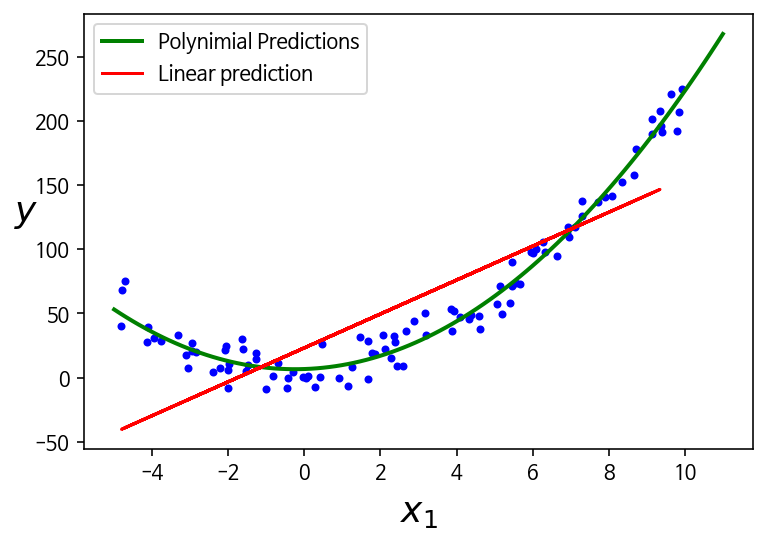

In [42]:
X_new = np.linspace(-5, 11, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'g', linewidth=2, label='Polynimial Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.plot(X_test, pred, 'r', label='Linear prediction')
plt.legend()
plt.show()

### 다항회귀 분석

In [57]:
# 속성(변수) 선택
X = ndf[['차중']]         # 독립 변수 X
y = ndf['연비(mpg)']    # 종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,                  # 독립 변수
                                                    y,                  # 종속 변수
                                                    test_size=0.3,      # 검증 30%
                                                    random_state=10)    # 랜덤 추출 값

print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수: (274, 1)
test data 개수: (118, 1)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 변환
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
print('원 데이터:', X_train.shape)
print('2차항 변환 데이터:', X_train_poly.shape)

원 데이터: (274, 1)
2차항 변환 데이터: (274, 3)


In [59]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [60]:
# 아래의 코드는 에러를 유발합니다.
r_square = pr.score(X_test, y_test)   # 학습할 때 3개의 특성으로 학습했기 때문에 1개의 특성만을 집어 넣으면 모델이 결과를 낼 수 없음,
r_square                              # 3개로 맞춰주어야 함

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [61]:
X_test.shape

(118, 1)

In [62]:
X_test_poly = poly.fit_transform(X_test)    # X_test 데이터를 2차항으로 변형 ## 학습할 때처럼 피처를 3개로 바꿔주는 작업

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = pr.score(X_test_poly, y_test)
r_square

0.7087009262975481

In [63]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = pr.predict(X_test_poly)

In [67]:
df_y_test = pd.DataFrame({'y_hat': y_hat, 'y': y_test})
df_y_test['차이'] = df_y_test['y_hat'] - df_y_test['y']
df_y_test

,y_hat,y,차이
243,24.665360,21.5,3.165360
371,26.544100,29.0,-2.455900
300,18.989293,23.9,-4.910707
345,35.166630,35.1,0.066630
265,15.167901,17.5,-2.332099
...,...,...,...
384,32.660293,32.0,0.660293
20,25.115790,25.0,0.115790
189,15.742081,15.5,0.242081
60,27.733581,20.0,7.733581


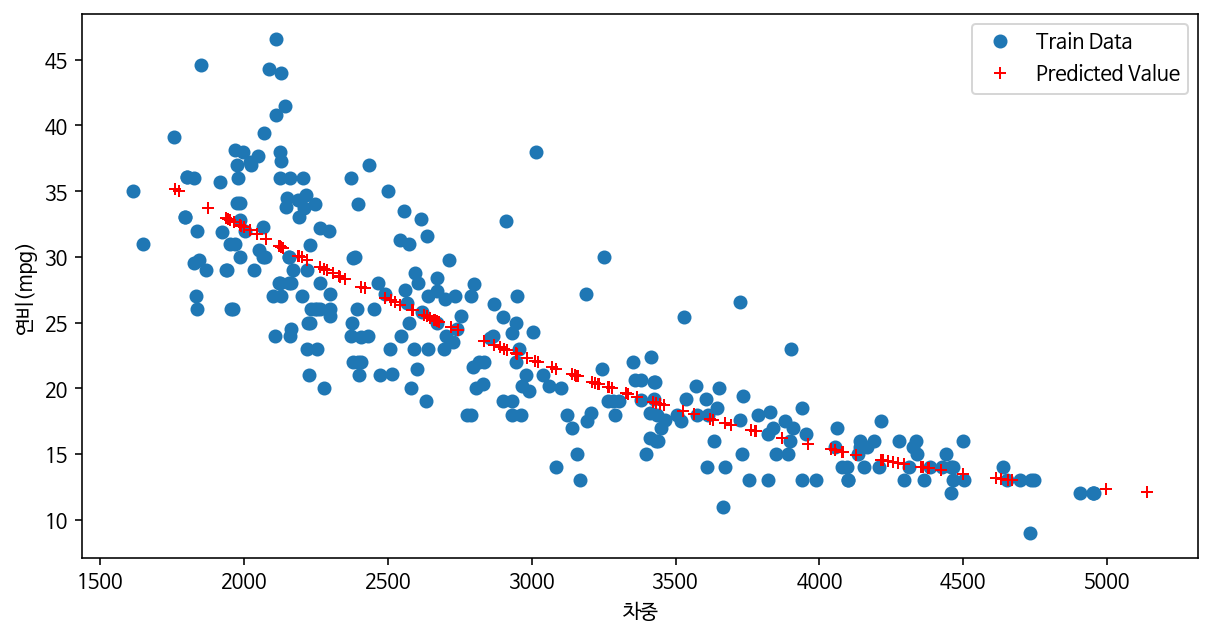

In [68]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')     # 데이터 분포
ax.plot(X_test, y_hat, 'r+', label='Predicted Value')  # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('차중')
plt.ylabel('연비(mpg)')
plt.show()
plt.close()

### 다중회귀 분석

데이터셋 구분 - 훈련용(train data)/검증용(test data)

In [69]:
# 속성(변수) 선택
X = ndf[['실린더 수', '출력', '차중']]    # 독립 변수 X1, X2, X3
y = ndf['연비(mpg)']                      # 종속 변수 Y

# train data 와 test data 로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,                  # 독립 변수
                                                    y,                  # 종속 변수
                                                    test_size=0.3,      # 검증 30%
                                                    random_state=10)    # 랜덤 추출 값

print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수: (274, 3)
test data 개수: (118, 3)


In [71]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6939048496695599

In [72]:
# 회귀식의 기울기
print('X 변수의 계수 a:', lr.coef_)

X 변수의 계수 a: [-0.60691288 -0.03714088 -0.00522268]


In [73]:
# 회귀식의 y절편
print('상수항 b:', lr.intercept_)

상수항 b: 46.414351269634025


In [75]:
# 모형에 X_test 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X_test)
y_hat

array([26.30243119, 27.67960352, 20.35480988, 32.5663334 , 15.05079818,
       18.65250234, 16.5189694 ,  8.21482855, 30.00898418, 28.56105525,
       21.63593175, 22.17449944, 26.73546308, 27.06911576, 13.10907653,
       16.81024194, 24.07783306, 29.38394295, 11.27643241, 10.64851363,
       12.83398787, 30.95656774, 23.11048993, 14.9956607 , 16.14345244,
        9.63707709, 19.31184005, 30.31070208, 22.37815073, 25.60054305,
       22.17386758, 22.66539802, 27.34304014, 24.03375623, 23.58227736,
       30.06694949, 31.83692148, 20.6513051 , 16.26186076, 26.65768848,
       22.66017535, 23.58573705, 30.31476048, 24.14617908, 23.74689385,
       11.7401859 , 14.8546484 , 31.8171619 , 22.76694089, 29.65204595,
       28.81465448, 11.37686071, 23.72676593, 13.75497533, 16.3454236 ,
       23.8068028 , 23.83990186, 29.99153659, 30.15796496, 26.51261777,
       31.02273271, 27.92508595, 20.72312738, 23.67799884, 26.50273798,
       32.31273417,  9.89019362, 25.48444753, 23.64014488, 14.31

In [76]:
df_y = pd.DataFrame({'y_hat': y_hat, 'y': y_test})
df_y

,y_hat,y
243,26.302431,21.5
371,27.679604,29.0
300,20.354810,23.9
345,32.566333,35.1
265,15.050798,17.5
...,...,...
384,31.235698,32.0
20,26.800447,25.0
189,16.409892,15.5
60,28.067812,20.0


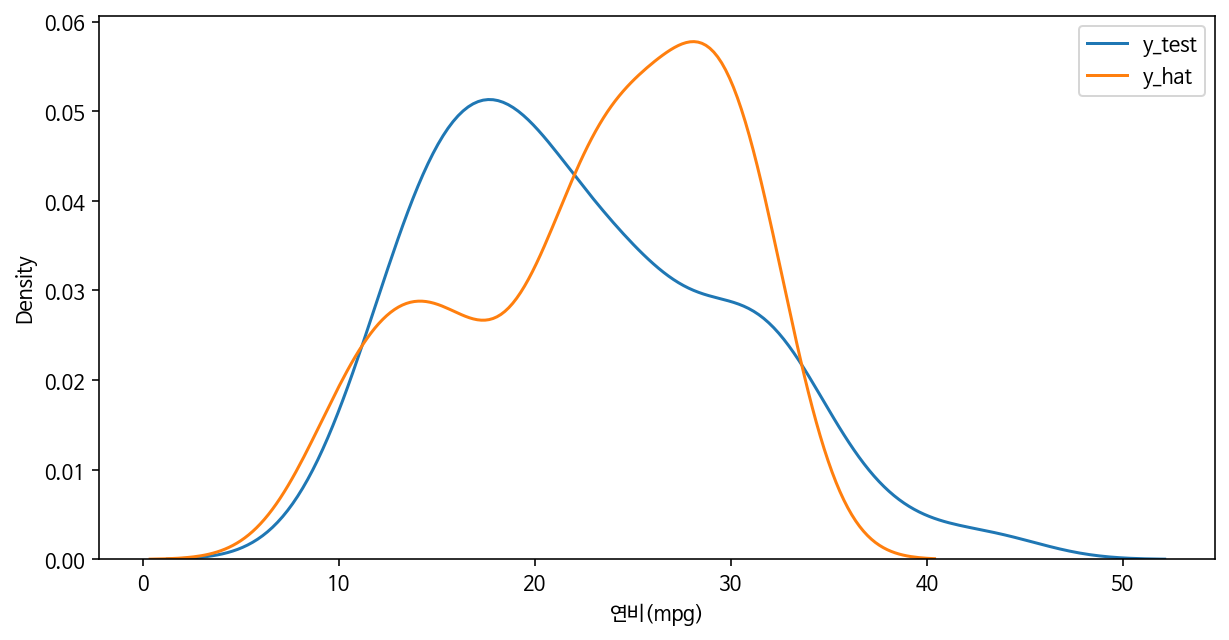

In [77]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [78]:
((df_y['y_hat'] - df_y['y'])**2).mean()

17.330085628989945